In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cleaned_olist_data.csv')

In [11]:
data.head()

,customer_id,city,state,order_status,purchase_timestamp,delivered_date,estimated_date,product_id,price,freight_value,order_id,payment_type,installations,payment_value,review_id,review,weight,product_category,difference_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,delivered,2017-05-16 15:05:00,2017-05-25 10:35:00,2017-06-05,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,00e7ee1b050b8499577073aeb2a297a1,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,8683.0,office_furniture,10
1,d3286ca43aa21423c6045b2806ca8e56,pelotas,RS,delivered,2018-01-30 19:29:00,2018-03-16 01:41:00,2018-03-20,a9516a079e37a9c9c36b9b78b10169e8,106.99,38.59,b1cc044d321053348a5e482ca7e6b2e3,credit_card,1.0,145.58,4d36f8266245b00faebc520e9cd963c0,2.0,8683.0,office_furniture,3
2,44e25679aa4d5d2ef5103f6b0174a586,barueri,SP,delivered,2017-12-07 16:41:00,2017-12-18 18:10:00,2018-01-09,a9516a079e37a9c9c36b9b78b10169e8,112.99,18.51,03afb3c10af52ddfa3c33b9881bf43f8,credit_card,2.0,131.50,e934b832e3bd9951f2a163ea80cfe20d,4.0,8683.0,office_furniture,21
3,cd042ac503b01b08c0c1e582bb978154,alagoinhas,BA,delivered,2017-02-13 16:22:00,2017-03-13 11:14:00,2017-03-29,a9516a079e37a9c9c36b9b78b10169e8,119.99,21.29,01db310c16db46c62c3d4e0857990f32,boleto,1.0,141.28,93ac91ef092822e23b26da459d19abd6,5.0,8683.0,office_furniture,15
4,90714b0e62fe1fbd304fb45fd644ebdd,sao paulo,SP,delivered,2018-02-24 08:45:00,2018-03-02 21:51:00,2018-03-27,a9516a079e37a9c9c36b9b78b10169e8,116.99,18.53,64a9f2b487f66506d463ca18152280e8,credit_card,13.0,135.52,84d15544e1fd5221b812cda0d23ae242,1.0,8683.0,office_furniture,24


In [4]:
data.isnull().sum()/data.shape[0]*100

customer_id           0.0
city                  0.0
state                 0.0
order_status          0.0
purchase_timestamp    0.0
delivered_date        0.0
estimated_date        0.0
product_id            0.0
price                 0.0
freight_value         0.0
order_id              0.0
payment_type          0.0
installations         0.0
payment_value         0.0
review_id             0.0
review                0.0
weight                0.0
product_category      0.0
difference_days       0.0
dtype: float64

In [5]:
data.shape

(102471, 19)

In [93]:
data = data.dropna()

In [94]:
data = data.drop_duplicates()

In [6]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102471 entries, 0 to 102470
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   customer_id         102471 non-null  object        
 1   city                102471 non-null  object        
 2   state               102471 non-null  object        
 3   order_status        102471 non-null  object        
 4   purchase_timestamp  102471 non-null  datetime64[ns]
 5   delivered_date      102471 non-null  object        
 6   estimated_date      102471 non-null  object        
 7   product_id          102471 non-null  object        
 8   price               102471 non-null  float64       
 9   freight_value       102471 non-null  float64       
 10  order_id            102471 non-null  object        
 11  payment_type        102471 non-null  object        
 12  installations       102471 non-null  float64       
 13  payment_value       102471 no

In [9]:
data['purchase_timestamp'] = pd.to_datetime(data['purchase_timestamp'])

C:\Users\HP\AppData\Local\Temp\ipykernel_2188\1198146400.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['purchase_timestamp'] = pd.to_datetime(data['purchase_timestamp'])


In [111]:
data['difference_days'] = (data['estimated_date'] - data['delivered_date']).dt.days

In [113]:
data = data.drop(columns=['difference'])

In [9]:
data.describe()

,price,freight_value,installations,payment_value,review,weight,difference_days
count,102471.000000,102471.000000,102471.000000,102471.000000,102471.000000,102471.000000,102471.000000
mean,123.449510,20.111183,2.909135,157.274258,4.125245,2095.846630,11.047145
std,186.210171,15.790586,2.731451,215.971621,1.310498,3752.798161,10.161873
min,0.850000,0.000000,0.000000,0.000000,1.000000,0.000000,-189.000000
25%,40.000000,13.150000,1.000000,58.260000,4.000000,300.000000,6.000000
50%,78.000000,16.360000,2.000000,102.640000,5.000000,700.000000,12.000000
75%,138.200000,21.230000,4.000000,176.645000,5.000000,1800.000000,16.000000
max,6735.000000,409.680000,24.000000,13664.080000,5.000000,40425.000000,146.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

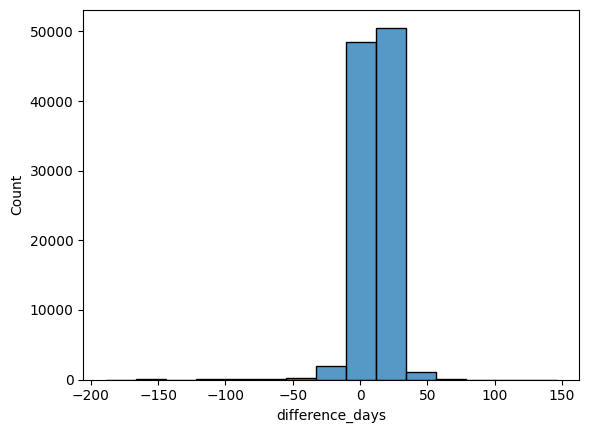

In [21]:
sns.histplot(x='difference_days', bins=15, data=data)
plt.show()

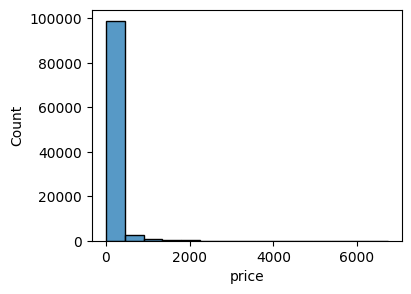

In [31]:
plt.figure(figsize=(4,3))
sns.histplot(x='price', bins=15, data=data)
plt.show()

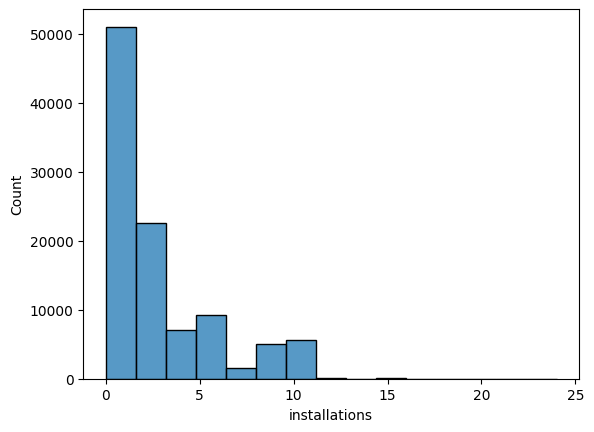

In [26]:
sns.histplot(x='installations', bins=15, data=data)
plt.show()

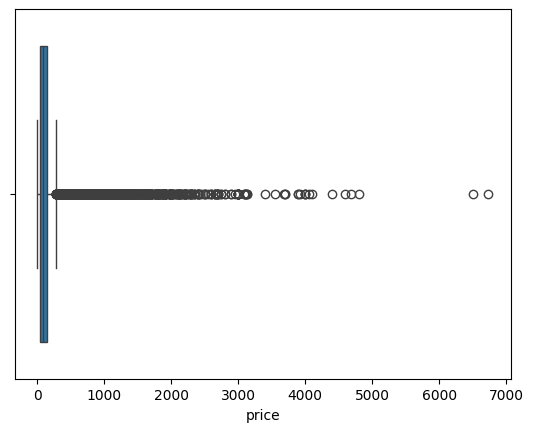

In [32]:
sns.boxplot(x='price', data=data)
plt.show()

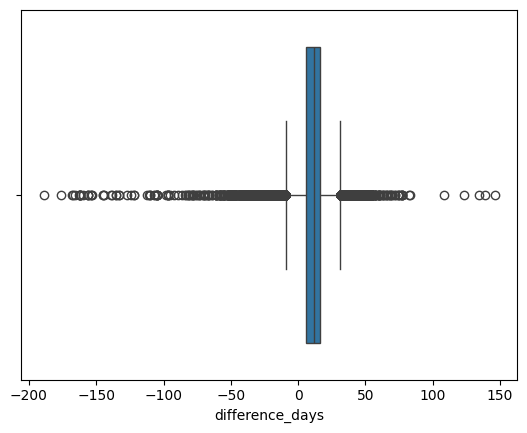

In [34]:
sns.boxplot(x='difference_days', data=data)
plt.show()

In [13]:
data['purchase_timestamp'].max() - data['purchase_timestamp'].min()

Timedelta('695 days 05:16:00')

In [ ]:
!pip install prophet

# Sales Forecasting: TIME SERIES FORCASTING

In [1]:
from prophet import Prophet

In [5]:
df = pd.read_csv('cleaned_olist_data.csv', usecols=['purchase_timestamp', 'payment_value'])

In [17]:
df.head()

,ds,y
0,2017-05-16 15:05:00,146.87
1,2018-01-30 19:29:00,145.58
2,2017-12-07 16:41:00,131.50
3,2017-02-13 16:22:00,141.28
4,2018-02-24 08:45:00,135.52


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102471 entries, 0 to 102470
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   purchase_timestamp  102471 non-null  datetime64[ns]
 1   payment_value       102471 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.6 MB


In [13]:
df['purchase_timestamp'] = pd.to_datetime(df['purchase_timestamp'], format="%Y-%m-%d")

In [16]:
df = df.rename(columns={"purchase_timestamp": "ds", "payment_value": "y"})

In [21]:
df['ds'] = pd.to_datetime(df['ds'])  
df = df.groupby('ds').agg({'y': 'sum'}).reset_index()  

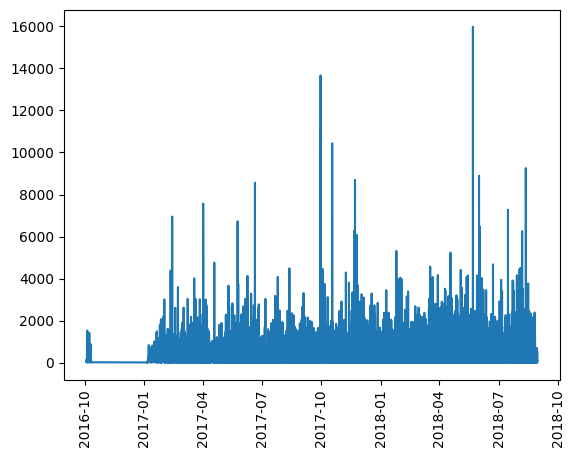

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(df['ds'], df['y'])
plt.xticks(rotation='vertical')
plt.show()

In [30]:
model = Prophet()
model.fit(df)

15:30:24 - cmdstanpy - INFO - Chain [1] start processing
15:30:34 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
84768,2018-09-24 15:00:00,172.248564,-186.436637,550.940832,169.918413,174.194066,20.528062,20.528062,20.528062,20.251419,20.251419,20.251419,0.276643,0.276643,0.276643,0.0,0.0,0.0,192.776626
84769,2018-09-25 15:00:00,172.070394,-135.502284,581.669144,169.634259,174.137974,23.383602,23.383602,23.383602,20.251419,20.251419,20.251419,3.132183,3.132183,3.132183,0.0,0.0,0.0,195.453996
84770,2018-09-26 15:00:00,171.892224,-145.916813,553.116136,169.356247,174.151251,17.048203,17.048203,17.048203,20.251419,20.251419,20.251419,-3.203216,-3.203216,-3.203216,0.0,0.0,0.0,188.940427
84771,2018-09-27 15:00:00,171.714053,-186.893182,561.715968,169.021940,174.127913,20.618370,20.618370,20.618370,20.251419,20.251419,20.251419,0.366951,0.366951,0.366951,0.0,0.0,0.0,192.332423
84772,2018-09-28 15:00:00,171.535883,-167.373631,552.538251,168.671178,174.104456,27.484614,27.484614,27.484614,20.251419,20.251419,20.251419,7.233195,7.233195,7.233195,0.0,0.0,0.0,199.020497


In [31]:
forecast['yhat'].sum()

np.float64(16121039.451754017)

# Total revenue generated by the company in next 30 days = 1.6 Crores

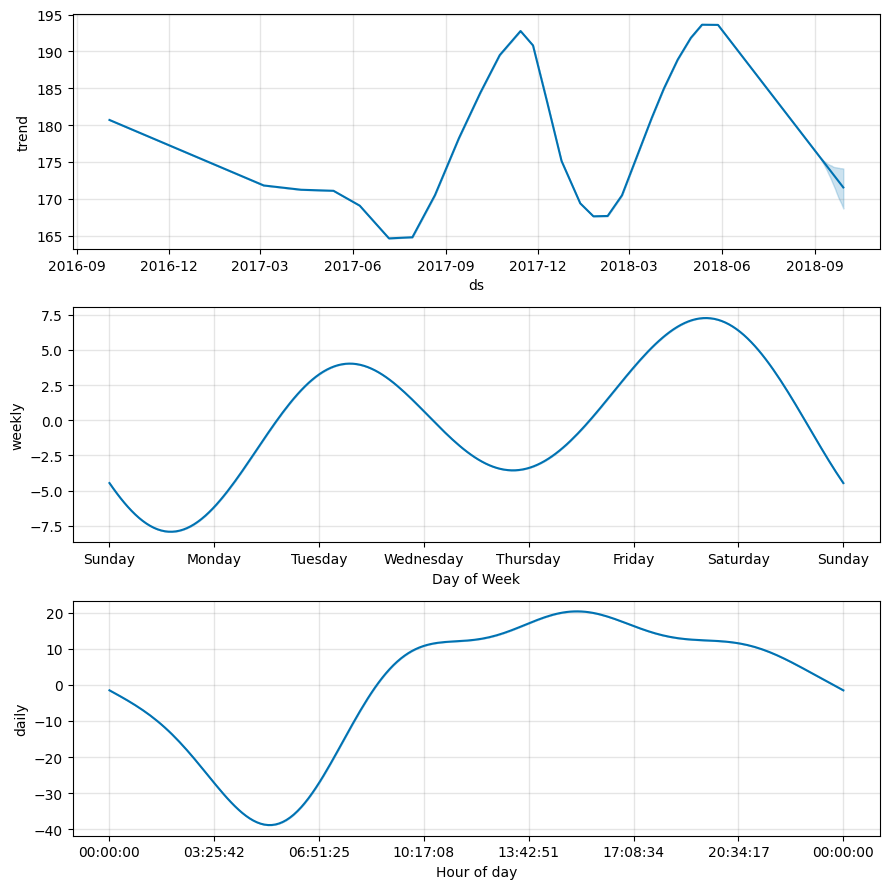

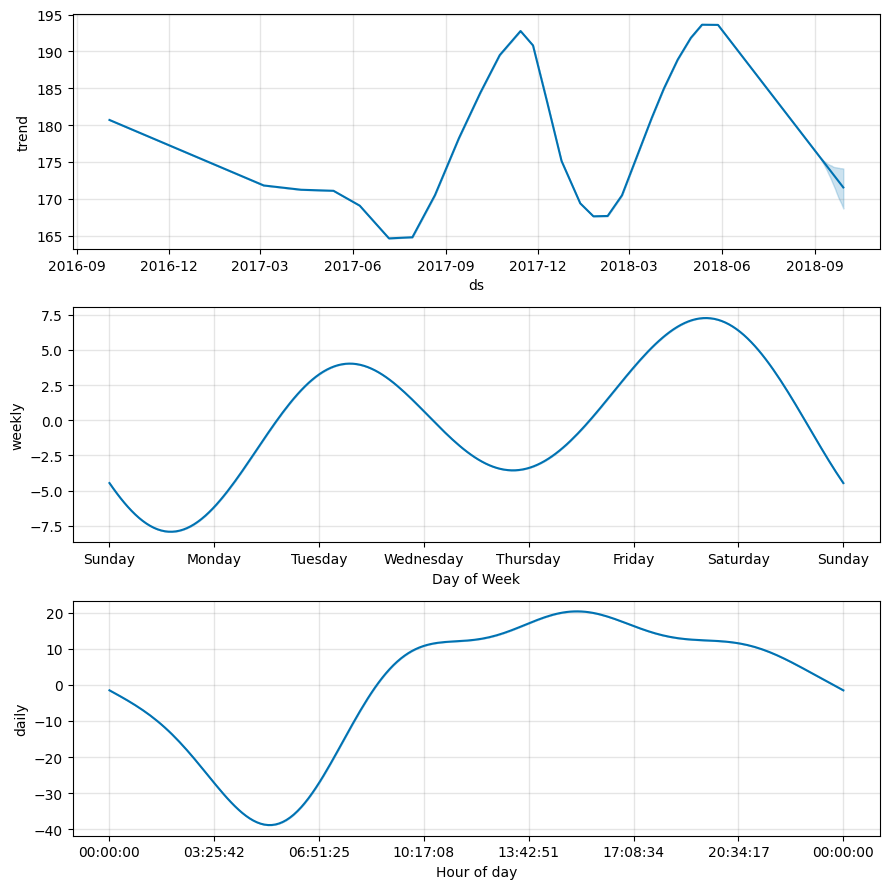

In [36]:
model.plot_components(forecast)